In [ ]:
!pip install -q -U tensorflow-addons
# !pip install -q -U bing-image-downloader

     |████████████████████████████████| 706kB 5.2MB/s 


In [ ]:
path = '/content/drive/MyDrive/VGG_Face/lfw-deepfunneled/lfw-deepfunneled'

celeb_dict = {}
for celeb in os.listdir(path):
    for img in os.listdir(os.path.join(path,celeb)):
        if celeb in celeb_dict:
            celeb_dict[celeb]+=1
        else:
            celeb_dict[celeb] = 1

In [ ]:
n4 = []
nelse = []
count=0
for k,v in celeb_dict.items():
    if v==4:
        n4.append(k) 
    else:
        if v>1:
            nelse.append(k)

In [ ]:
len(n4) + len(nelse)

1681

In [ ]:
import shutil
shutil.rmtree('/content/pics/downloads')

In [ ]:
%cd '/content/pics'

/content/pics


In [ ]:
_path = '/content/drive/MyDrive/VGG_Face/output/try_test'

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
cascade_file_src = "/content/drive/MyDrive/VGG_Face/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascade_file_src)

In [ ]:
shutil.rmtree('/content/triplet/embeddings')
shutil.rmtree('/content/triplet/test')

In [ ]:
len(os.listdir('/content/triplet/embeddings'))

187

In [ ]:
missed_ev = []
for dir in os.listdir(path):
    if dir in n4:
        try:
            os.mkdir('/content/triplet/embeddings/'+dir)
            os.mkdir('/content/triplet/test/'+dir)
        except:
            pass
        c = 0
        for img in os.listdir(path+'/'+dir):
            if c<2:
                image = cv2.imread(path+'/'+dir+'/'+img)
                faces = faceCascade.detectMultiScale(image)
                # for (x, y, w, h) in faces:
                #     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

                try:
                    im = Image.open(path+'/'+dir+'/'+img)
                    crpim = im.crop((faces[0][0],faces[0][1],faces[0][2]+faces[0][0],faces[0][3]+faces[0][1]))
                    new = '/content/triplet/embeddings/'+dir
                    crpim.save(new +'/'+ img)
                except Exception:
                    missed_ev.append(path+'/'+dir+'/'+img)
                    pass
            else:
                image = cv2.imread(path+'/'+dir+'/'+img)
                faces = faceCascade.detectMultiScale(image)
                # for (x, y, w, h) in faces:
                #     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

                try:
                    im = Image.open(path+'/'+dir+'/'+img)
                    crpim = im.crop((faces[0][0],faces[0][1],faces[0][2]+faces[0][0],faces[0][3]+faces[0][1]))
                    new = '/content/triplet/test/'+dir
                    crpim.save(new +'/'+ img)
                except Exception:
                    missed_ev.append(path+'/'+dir+'/'+img)
                    pass
            c+=1

    else:
        continue

In [ ]:
%cd '/content/drive/MyDrive/VGG_Face'

/content/drive/MyDrive/VGG_Face


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import os
import shutil
from distutils.dir_util import copy_tree
!pip install -q -U tensorflow-addons
import tensorflow_addons as tfa
import cv2
import numpy as np
from PIL import Image
from tensorflow import keras
import pickle
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, Lambda
from keras.models import model_from_json

     |████████████████████████████████| 706kB 9.2MB/s 


**Old Face Model with 2622 classes**

In [ ]:
model = Sequential()

model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(224,224,3)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(4096, 7, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(4096, 1, activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(2622, 1, activation='relu'))

In [ ]:
model.load_weights('/content/drive/MyDrive/VGG_Face/vgg_face_weights.h5')

**New Face Model with 1680 classes**

In [ ]:
lfw_face_model = Model(inputs=model.layers[0].input, outputs=model.layers[-1].output)

for layer in lfw_face_model.layers:
    layer.trainable=False

# do = Dropout(0.5)(lfw_face_model.output)
# fc = Conv2D(1680, 1)(do)
# do1 = Dropout(0.5)(fc)
# fc1 = Conv2D(500, 1)(do1)
# do2 = Dropout(0.5)(fc1)
flatten = Flatten()(lfw_face_model.output)
fc2 = Dense(1024, name='feature_vector', activation=None)(flatten)
normalized = Lambda(lambda x: tf.math.l2_normalize(x, axis=1), name='normalized_features')(fc2)
new_lfw_face_model = Model(inputs = lfw_face_model.input, outputs = normalized)

In [ ]:
new_lfw_face_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16_input (InputLayer) [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0   

**paths to train, test and validation datasets**

In [ ]:
train_path = '/content/drive/MyDrive/VGG_Face/output/try_train_haar'
val_path = '/content/drive/MyDrive/VGG_Face/output/try_val_haar'
test_path = '/content/drive/MyDrive/VGG_Face/output/try_test_haar'

In [ ]:
classes = os.listdir('/content/triplet/train')

In [ ]:
len(classes)

1494

In [ ]:
from distutils.dir_util import copy_tree
import shutil

In [ ]:
copy_tree('/content/drive/MyDrive/triplet','/content/triplet')

In [ ]:
with tf.device('/device:GPU:0'):
    shutil.copy("/content/triplet_loss/model/14.h5", 
              "/content/drive/MyDrive/VGG_Face/output/model")

**Image Data Generator, flow from directory**

In [ ]:
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory('/content/triplet/train', target_size=(224,224), classes = classes,
                                                                       class_mode='sparse', shuffle=True, batch_size=128)

# val_batches = ImageDataGenerator(rescale=1./255).flow_from_directory('/content/data/val', target_size=(224,224), classes = classes)

# test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory('/content/triplet_loss/test',target_size=(224,224), classes = classes,
                                                                    #   shuffle=False, class_mode='sparse')

Found 8396 images belonging to 1494 classes.


In [ ]:
shutil.rmtree('/content/triplet/model/')

**Compile model**

In [ ]:
new_lfw_face_model.compile(optimizer='adam', loss= tfa.losses.TripletSemiHardLoss(margin=0.5))

In [ ]:
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='/content/triplet/model/{epoch:02d}.h5')

**fit the model**

In [ ]:
new_lfw_face_model.fit(train_batches, epochs=15, callbacks=[callbacks])

Epoch 1/15
66/66 [==============================] - 76s 795ms/step - loss: 0.3314
Epoch 2/15
66/66 [==============================] - 41s 619ms/step - loss: 0.2107
Epoch 3/15
66/66 [==============================] - 41s 618ms/step - loss: 0.1826
Epoch 4/15
66/66 [==============================] - 41s 623ms/step - loss: 0.1701
Epoch 5/15
66/66 [==============================] - 41s 620ms/step - loss: 0.1833
Epoch 6/15
66/66 [==============================] - 41s 623ms/step - loss: 0.1841
Epoch 7/15
66/66 [==============================] - 41s 620ms/step - loss: 0.1573
Epoch 8/15
66/66 [==============================] - 41s 621ms/step - loss: 0.1613
Epoch 9/15
66/66 [==============================] - 41s 623ms/step - loss: 0.1603
Epoch 10/15
66/66 [==============================] - 41s 622ms/step - loss: 0.1634
Epoch 11/15
66/66 [==============================] - 41s 619ms/step - loss: 0.1496
Epoch 12/15
66/66 [==============================] - 41s 620ms/step - loss: 0.1445
Epoch 13/15
6

In [ ]:
triplet_model = keras.models.load_model('/content/drive/MyDrive/VGG_Face/output/model/14_triplet.h5')

In [ ]:
results = triplet_model.predict(test_batches)

In [ ]:
np.savetxt("vecs.tsv", results, delimiter='\t')

In [ ]:
# import io
# import tensorflow_datasets as tfds
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# for img, labels in test_batches:
#     [out_m.write(str(x) + "\n") for x in labels]
# out_m.close()

In [ ]:
new_lfw_face_model.evaluate(test_batches) # without haar

4/4 [==============================] - 51s 11s/step - loss: 41.6995 - accuracy: 0.6200


[41.699546813964844, 0.6200000047683716]

In [ ]:
new_lfw_face_model.evaluate(test_batches) #with haar

4/4 [==============================] - 50s 11s/step - loss: 58.4607 - accuracy: 0.6900


[58.460655212402344, 0.6899999976158142]

In [ ]:
modle08 = keras.models.load_model('/content/drive/MyDrive/VGG_Face/output/model/08.h5')
modle19 = keras.models.load_model('/content/drive/MyDrive/VGG_Face/output/model/19.h5')

In [ ]:
modle08.evaluate(test_batches) #with haar and rescale

4/4 [==============================] - 1s 207ms/step - loss: 1.1568 - accuracy: 0.8000


[1.1567518711090088, 0.800000011920929]

In [ ]:
modle19.evaluate(test_batches)

4/4 [==============================] - 1s 211ms/step - loss: 1.5241 - accuracy: 0.7800


[1.5240964889526367, 0.7799999713897705]

In [ ]:
shutil.rmtree('/content/data/model')

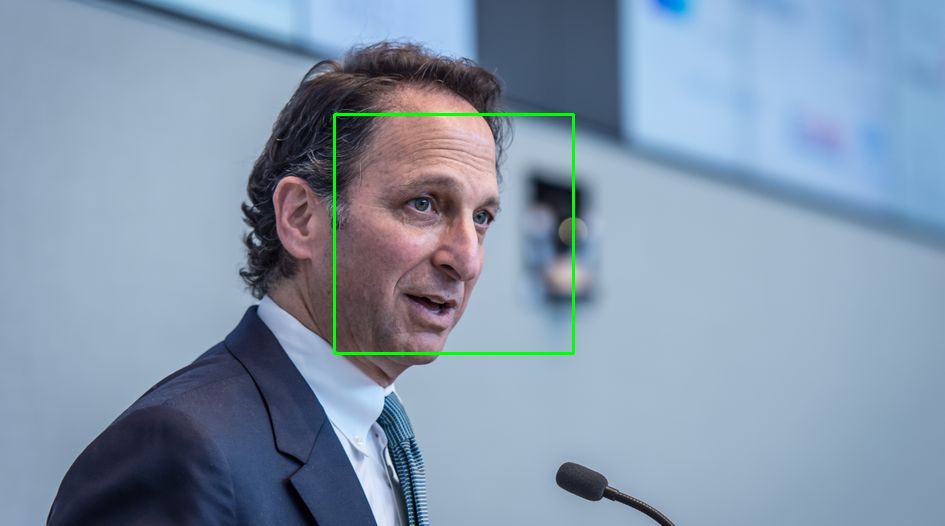

In [ ]:
im = Image.open('/content/drive/MyDrive/VGG_Face/az2.jpeg')
ar_img = np.array(im)
faces = faceCascade.detectMultiScale(ar_img)
for (x, y, w, h) in faces:
    cv2.rectangle(ar_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
im = Image.fromarray(ar_img)
im

In [ ]:
crpim = im.crop((faces[0][0],faces[0][1],faces[0][2]+faces[0][0],faces[0][3]+faces[0][1]))

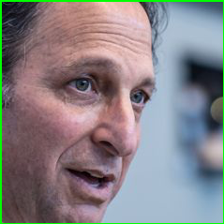

In [ ]:
crpim = crpim.resize((224,224))
crpim

In [ ]:
triplet_face_model = keras.models.load_model('/content/drive/MyDrive/triplet/model/14.h5')

In [ ]:
features = {}
path = '/content/drive/MyDrive/triplet/embeddings'
for celeb in os.listdir(path):
    for image in os.listdir(os.path.join(path,celeb)):
        im = Image.open(os.path.join(path,celeb,image)).resize((224,224))
        ar = np.array(im)
        ar = ar/255
        ar = np.expand_dims(ar, axis=0)
        embed = triplet_face_model.predict(ar)
        if celeb.upper() in features:
            features[celeb.lower()] = embed[0]
        else:
            features[celeb.upper()]=embed[0]

In [ ]:
len(os.listdir('/content/drive/MyDrive/triplet/train'))

1494

In [ ]:
# test_feaures = {}
test_results = {}
path_test = '/content/drive/MyDrive/triplet/test'
for celeb in os.listdir(path_test):
    for image in os.listdir(os.path.join(path_test,celeb)):
        im = Image.open(os.path.join(path_test,celeb,image)).resize((224,224))
        ar = np.array(im)
        ar = ar/255
        ar = np.expand_dims(ar, axis=0)
        pr = triplet_face_model.predict(ar)
        pr = pr[0]
        minim=1e6
        new_minim=1e6
        for k,v in features.items():
            dist = np.linalg.norm(pr-v)
            old_minim = new_minim
            new_minim = min(old_minim,dist)
            if new_minim < old_minim:
                label = k.lower()
                minn=new_minim
            else:
                continue
        if celeb in test_results:
            test_results[celeb.lower()] = (label,minn)
        else:
            test_results[celeb]=(label,minn)

In [ ]:
test_results

{'Aaron_Peirsol': ('aaron_peirsol', 0.7370583),
 'Abdoulaye_Wade': ('abdoulaye_wade', 0.56644505),
 'Abdullah': ('abdullah', 0.5949915),
 'Abel_Pacheco': ('abel_pacheco', 0.6070645),
 'Adam_Sandler': ('herb_sendek', 0.870934),
 'Alec_Baldwin': ('alec_baldwin', 0.7849098),
 'Aleksander_Kwasniewski': ('yevgeny_kafelnikov', 0.7579385),
 'Alexander_Downer': ('alexander_downer', 0.6678499),
 'Alexander_Losyukov': ('bashar_assad', 0.883905),
 'Alvaro_Silva_Calderon': ('alvaro_silva_calderon', 0.76367235),
 'Amanda_Bynes': ('amanda_bynes', 0.54047334),
 'Amer_al-Saadi': ('amer_al-saadi', 0.55126613),
 'Anders_Fogh_Rasmussen': ('anders_fogh_rasmussen', 0.701761),
 'Angelo_Reyes': ('angelo_reyes', 0.5211047),
 'Antony_Leung': ('antony_leung', 0.4244409),
 'Arianna_Huffington': ('arianna_huffington', 0.745923),
 'Art_Howe': ('art_howe', 0.6392161),
 'Augustin_Calleri': ('augustin_calleri', 0.62399006),
 'Azra_Akin': ('azra_akin', 0.52844334),
 'Barbara_Walters': ('barbara_walters', 0.7258628),
 

In [ ]:
count=0
for k,v in test_results.items():
    if k.lower() == v[0]:
        count+=1
    else:
        continue

In [ ]:
len(test)

187

In [ ]:
count/len(test_results.values())

0.7352941176470589

In [ ]:
features

In [ ]:
feature_path = '/content/drive/MyDrive/triplet'

In [ ]:

with open (os.path.join(feature_path,'embeds.pkl'), 'wb') as f:
    pickle.dump(features,f)

In [ ]:
with open (os.path.join(feature_path,'embeds.pkl'), 'rb') as f:
    features = pickle.load(f)